Figures index:

Peak count maps: feats_3d_bgsub.ipynb (3d data); feature_extraction.ipynb (2d data)


In [2]:
from xrdc.datasets import d2d
from xrdc import source_separation as sep
from xrdc import visualization as vis
from xrdc import peak_fitting as pf
from xrdc import featurization as feat

def norm(arr):
    return arr / arr.mean()

Loading Data from: /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/inputs/
Data Loaded Succesfully
(177, 800)
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


In [3]:
def get_coords(dgrid):
    coords = np.array([dgrid.coord(ii + 1) for ii in range(177)])
    return coords

swap3d = lambda arr: np.einsum("ijk->kij", arr)

def csim3d(activations_n1):
    #activations_n1 = swap3d(activations_n1)
    tmp = np.einsum("kij, klm->ijlm", activations_n1, activations_n1)

    norm = np.linalg.norm(activations_n1, axis = 0)

    norm4d = np.einsum("ij, kl->ijkl", norm, norm)

    tmp_csim = tmp / (norm4d + 1e-30)
    return tmp_csim

def gridstack(arr4d):
    return np.vstack(np.dstack(np.transpose(arr4d, (1, 0, 2, 3))))

def plot_clusters_grid(coords, clust, nclust):
    import matplotlib
    dim = coords.max()
    coordi = coords - 1
    hues = [float(float(x)/float(nclust)) for x in range(1,nclust+1)]
    cg = cluster_grid = np.zeros(shape = (dim,dim,3))
    for k, (x, y) in enumerate(coordi):
        cluster = clust[k]
        cluster_grid[x, y] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
#     if debug:
#         print(coords)

#     fig = plt.figure()
#     fig.tight_layout()
    start, end = nclust - 1, nclust
    Big_labels = []
    Big_labels.append(clust)
    plt.imshow(cg)
    
def rmap(arr):
    """
    Map feature indices to random floats for visualization (temporary hack)
    """
    imax = arr.max()
    arr = arr.copy().astype(float)

    for i in range(1, imax + 1):
        new = np.random.random()
        arr[arr == i] = new
    return arr
 
# merge eventually into featurization.peakfit_featurize, needs to be more general to handle both 2 and 3-d arrays
def peakfit_featurize(patterns_pp, fitlists, size_thresh = 5, thicken_ax0 = 1, normf = feat.norm3d):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
        smooth_ax1 = 1,
        smooth_ax0 = thicken_ax0, threshold_percentile = 50, thicken = True, size_thresh = size_thresh, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 1,
        thicken_ax1 = 0, flood_threshold=.95, smooth_factor_ax1 = .125, fitlists = fitlists,
    peakwidth = 1, normf = normf)
    return labeled, feature_masks, activations, norm_, activations_n1

# heatmap overlayed with binary mask
def overlay_mask(img, mask, **kwargs):
    grayscale = 1 - mask
    alpha = mask
    rgb_img = np.dstack((grayscale, (grayscale), grayscale, (alpha)))
    plt.imshow(np.log(1 + img), cmap = 'jet', **kwargs)
    plt.imshow(rgb_img, cmap = 'Greys', **kwargs)

In [4]:
import numpy as np

In [5]:
ls ../../slacpaper

figures/      iopart12.clo    separation.aux  separation.tex
iopams.sty    iopart.cls      separation.log  setstack.sty
iopart10.clo  paper_figures/  separation.pdf


In [6]:
path = '../../slacpaper/paper_figures/'

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20, 10)

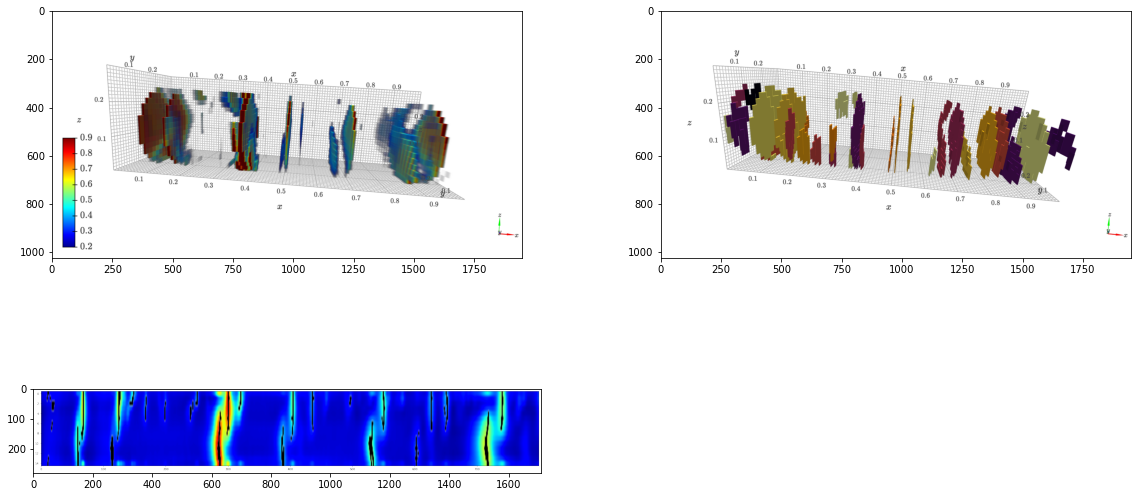

In [14]:
from PIL import Image
img1 = Image.open(path + '6/K3D-1641934967991.png')
img2 = Image.open(path + '6/K3D-1641934705480.png')
img3 = Image.open(path + '6/cut50.png')

a, b = 2, 2
plt.subplot(a, b, 1)
plt.imshow(img2)

plt.subplot(a, b, 2)
plt.imshow(img1)

plt.subplot(a, b, 3)
plt.imshow(img3)

In [8]:
import matplotlib

def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 1.0, 'Signal + features (2D cut)')

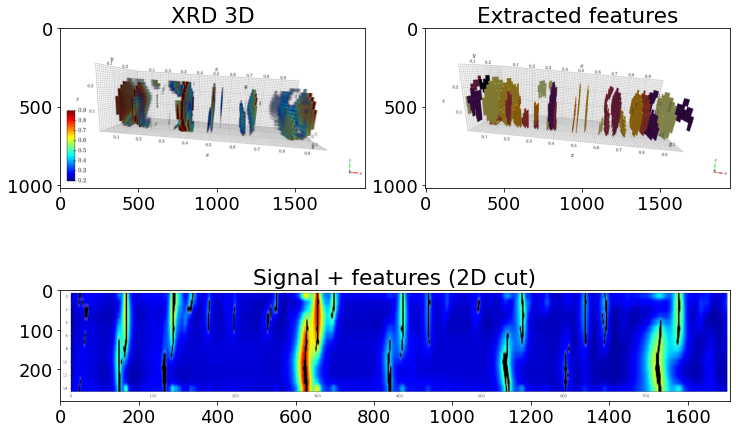

In [16]:
matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12, 8), constrained_layout=False)
spec = fig.add_gridspec(2, 2)

imargs = {'cmap': 'jet', 'aspect': 8}

ax0 = fig.add_subplot(spec[0, 0])
plt.imshow(img2)
plt.title('XRD 3D')

ax1 = fig.add_subplot(spec[0, 1])
plt.imshow(img1)
plt.title('Extracted features')
#annotate_axes(ax10, 'ax10')


ax2 = fig.add_subplot(spec[1, :])
plt.imshow(img3)
plt.title('Signal + features (2D cut)')
# plt.title("Log signal")

# ax3 = fig.add_subplot(spec[3, :])
# #heatmap(ax3, np.log(1 + norm(fast_q - fast_q.min())))
# heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")
# # annotate_axes(ax11, 'ax11')

# ax4 = fig.add_subplot(spec[4, :])
# heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
#         label = 'Featurization (peak shift-corrected)')

# imargs = {'cmap': 'jet', 'aspect': 1}

# ax50 = fig.add_subplot(spec[5:7, 0])
# img = ax50.imshow(feat.csim_pairs(patterns), cmap = 'jet')
# plt.title('Cos similarity (raw)')
# plt.colorbar(img, ax = ax50)

# ax51 = fig.add_subplot(spec[5:7, 1])
# img = ax51.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
# plt.title('Cos similarity (featurized)')
# plt.colorbar(img, ax = ax51)

# # fig.suptitle('Manually added subplots, spanning a column')

Fig. 2

In [9]:
patterns = d2d.patterns

In [10]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7)
background = slow_q

(0, 0)


In [11]:
reload(vis)

NameError: name 'reload' is not defined

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/visualization.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator


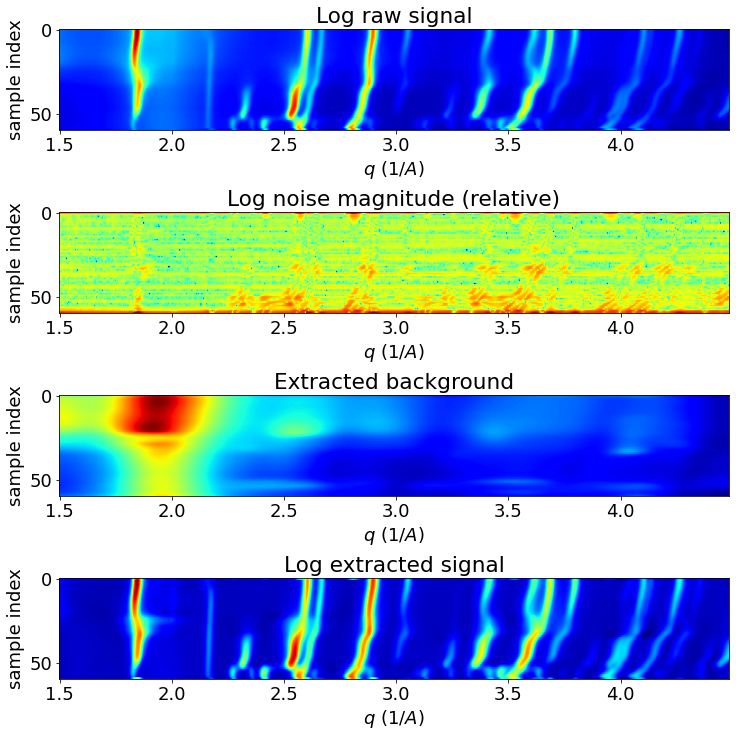

In [35]:
matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12, 23), constrained_layout=False)
spec = fig.add_gridspec(7, 2)

vis.imargs = {'cmap': 'jet', 'aspect': 1.5}

ax0 = fig.add_subplot(spec[0, :])
vis.heatmap(ax0, np.log(1 + norm(patterns)), label = 'Log raw signal')
# annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[1, :])
vis.heatmap(ax1, np.log10(np.abs(fast_T / patterns) ), "Log noise magnitude (relative)")
#annotate_axes(ax10, 'ax10')


ax2 = fig.add_subplot(spec[2, :])
vis.heatmap(ax2, background, 'Extracted background')
# plt.title("Log signal")

ax3 = fig.add_subplot(spec[3, :])
#heatmap(ax3, np.log(1 + norm(fast_q - fast_q.min())))
vis.heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")
# annotate_axes(ax11, 'ax11')

# ax4 = fig.add_subplot(spec[4, :])
# heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
#         label = 'Featurization (peak shift-corrected)')

# imargs = {'cmap': 'jet', 'aspect': 1}

# ax50 = fig.add_subplot(spec[5:7, 0])
# img = ax50.imshow(feat.csim_pairs(patterns), cmap = 'jet')
# plt.title('Cos similarity (raw)')
# plt.colorbar(img, ax = ax50)

# ax51 = fig.add_subplot(spec[5:7, 1])
# img = ax51.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
# plt.title('Cos similarity (featurized)')
# plt.colorbar(img, ax = ax51)

# fig.suptitle('Manually added subplots, spanning a column')

In [59]:
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [12]:
fsub_stop_2d = pf.curvefit_2d((patterns - 0), stdratio_threshold = 2, noise_estimate = fast_T,
                   background = background, bg_shift_pos = False)



numBlocks: 357, dataPts/Block: 1.6722689075630253
[  0.  34. 126. 182. 229. 262. 296. 341. 407. 429. 447. 500. 511. 538.
 566. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  34., 126., 182., 229., 262., 296., 341., 407., 429., 447.,
       500., 511., 538., 566., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.405102059239611
0.4481095909584606
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.5708371891781829
4.631350798179307
Peak at 70, iteration 0: error = 0.4367773987437696
0.17455047238442295
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.5122958306063615
0.9674636372555737
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-

                                                                                                                                                                                                                                                                      Peak at 572, start iteration with error = 0.5044750662189831
62.49283583417723
Peak at 572, iteration 0: error = 4.541490290043695
12.0953915236043
Peak at 572, iteration 1: error = 4.195469233686134
4.73759052220687
Peak at 572, iteration 2: error = 4.649022920238569
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 not using pool
    ----Saving data for block between 1.00 - 32.00
    ----Saving data for block between 33.00 - 125.00
    ----Saving data for block between 126.00 - 184.00
    ----Saving data for block between 185.00 - 228.00
    ----Saving data for block between 229.00 - 261.00
    ----Saving data for block between 262.00 - 295.00
    ----Saving data for block between 296.00 - 

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.4024882309118124
12.925115040745109
Peak at 1, iteration 0: error = 0.5707011493410163
1.2146794849116098
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.5725881155594668
544.2356775288098
Peak at 70, iteration 0: error = 26.30549654673577
18.397949417061774
Peak at 70, iteration 1: error = 15.284076446678709
14.949769613457788
Peak at 70, iteration 2: error = 15.285221955723099
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.25699086614165967
65.80411487214319
Peak at 134, iteration 0: error = 2.49294385822975
5.907342571476623
Peak at 134, iteration 1: error = 4.197167182434536
4.495982216995278
Peak at 134, itera

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 234, start iteration with error = 0.6281993997884685
122.35544601577084
Peak at 234, iteration 0: error = 3.96358030781331
11.442047625211185
Peak at 234, iteration 1: error = 9.115371391473005
5.469220614156832
Peak at 234, iteration 2: error = 11.33482661473774
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 280, start iteration with error = 0.8950629083641026
245.48148405711348
Peak at 280, iteration 0: error = 2.496964226005762
3.274628500594679
Peak at 280, iteration 1: error = 4.343125724690054
2.5588433150727363
Peak at 280, iteration 2: error = 4.342911088402389
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 311, start iteration with error = 0.5845956412080794
117.06363694878146
Peak at 311, iteration 0: erro

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 438, start iteration with error = 0.6308834870095775
384.72866152843443
Peak at 438, iteration 0: error = 0.33639154016336564
61.25070956314759
Peak at 438, iteration 1: error = 0.07343336984634796
10.890670225932052
Peak at 438, iteration 2: error = 0.05622143533855226
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 460, start iteration with error = 0.5586232110839675
325.18610191503893
Peak at 460, iteration 0: error = 16.50138443741466
28.272731006118704
Peak at 460, iteration 1: error = 7.7897178539174305
8.990657153036384
Peak at 460, iteration 2: error = 9.299089107295941
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 508, start iteration with error = 0.6682990670579882
98.64269040267332
Peak at 508, iteration 

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.3245504657985023
11.201936745555537
Peak at 1, iteration 0: error = 0.7337571529503786
1.3145266995469223
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 69, start iteration with error = 0.5619253117924188
322.7872718297579
Peak at 69, iteration 0: error = 27.10209613478118
10.182764737516505
Peak at 69, iteration 1: error = 16.4326014143727
8.358510109556645
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Peak at 69, iteration 2: error = 18.664531614087622
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.24874166020599114
51.70855268924588
Peak at 136, iteration 0: error = 2.8028397192516508
3.5529487389041394
Pe

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.3323007034721158
8.28396094189227
Peak at 1, iteration 0: error = 0.3804881001919153
1.0250671577182946
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 69, start iteration with error = 0.584038808720018
300.6693228885948
Peak at 69, iteration 0: error = 25.22143544155809
9.651965186615962
Peak at 69, iteration 1: error = 15.80418698973935
8.007812750147892
Peak at 69, iteration 2: error = 15.804187410740562
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.2020432419486053
33.56495602574859
Peak at 136, iteration 0: error = 2.647530689088029
2.005307511952936
Peak at 136, iteration 1: error = 3.760569465870779
1.4404040916806404
 /home/ollie/anaconda3/

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 233, start iteration with error = 0.8038522253281412
180.18678657214215
Peak at 233, iteration 0: error = 6.503661524510176
33.03707830214474
Peak at 233, iteration 1: error = 5.603074696089978
13.06592408853015
Peak at 233, iteration 2: error = 10.264112641959013
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 279, start iteration with error = 0.7333383280605688
246.64902003914304
Peak at 279, iteration 0: error = 9.159847732367156
3.703260171616097
Peak at 279, iteration 1: error = 12.180642133634873
2.959002804931671
Peak at 279, iteration 2: error = 12.18064204669957
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 309, start iteration with error = 0.4827565927182031
89.1692367168791
Peak at 309, iteration 0: error

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.3472260284871898
18.008299659585866
Peak at 1, iteration 0: error = 0.7565176290226805
1.7554071587479736
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.6478308017724048
171.19354810720677
Peak at 68, iteration 0: error = 22.02913032427733
5.851482567994245
Peak at 68, iteration 1: error = 14.70605276682656
4.900851475903319
Peak at 68, iteration 2: error = 14.706052859327773
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.21170147121607288
71.05049586904522
Peak at 136, iteration 0: error = 1.9904554714178069
2.302846354119672
Peak at 136, iteration 1: error = 2.708061450224768
1.6678708471045893
 /home/ollie/anac

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.38223079296147017
10.536289635293672
Peak at 1, iteration 0: error = 5.4827039042768835
1.1964681648196807
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.7145579651231109
242.55953161651541
Peak at 68, iteration 0: error = 22.5324789931753
8.875229963498654
Peak at 68, iteration 1: error = 17.071420337212846
7.620225586472564
Peak at 68, iteration 2: error = 17.0714201727485
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.23644223858092417
51.434289017110764
Peak at 136, iteration 0: error = 2.150696421358246
1.5327348480010423
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/data

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.22633135634001908
119.3126176744246
Peak at 136, iteration 0: error = 1.7289289702625448
2.844164638125997
Peak at 136, iteration 1: error = 2.307132815470744
2.0404711155197703
Peak at 136, iteration 2: error = 2.3071328144055046
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 220, start iteration with error = 0.6602867312351214
544.6829226944125
Peak at 220, iteration 0: error = 4.290174012482203
4.143672430119445
Peak at 220, iteration 1: error = 3.0579929696661763
4.072398133880501
Peak at 220, iteration 2: error = 2.608270698636767
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 233, start ite

numBlocks: 377, dataPts/Block: 1.5835543766578248
[  0.  31. 126. 185. 226. 259. 300. 348. 404. 425. 448. 493. 532. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  31., 126., 185., 226., 259., 300., 348., 404., 425., 448.,
       493., 532., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.39586750540983695
12.927929404295703
Peak at 1, iteration 0: error = 2.925704367530687
1.2358165568913588
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.7043290293791498
375.0160100722642
Peak at 68, iteration 0: error = 21.79430571695318
14.997914718396864
Peak at 68, iteration 1: error = 15.208519848781199
13.094840440583194
Peak at 68, iteration 2: error = 15.211709909128661
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/datapro

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.6121620695742559
30.565101260808927
Peak at 1, iteration 0: error = 3.9850818661920764
2.661811661923365
Peak at 1, iteration 1: error = 3.9809469563113073
2.1373335021208266
Peak at 1, iteration 2: error = 4.101203070259144
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.5083010642463006
214.99040002683478
Peak at 68, iteration 0: error = 21.64708301205636
10.372025015431817
Peak at 68, iteration 1: error = 10.857448899187341
9.033726060788103
Peak at 68, iteration 2: error = 10.857448903530795
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration wit

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.39601462497248335
16.13386708329671
Peak at 1, iteration 0: error = 1.356951497408503
1.2735533070567295
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.591795549362014
127.49939937700226
Peak at 68, iteration 0: error = 37.41967281595923
10.642675545346668
Peak at 68, iteration 1: error = 18.147302181259448
7.067166906735227
Peak at 68, iteration 2: error = 18.147302118880635
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.2498358780427275
110.32664982154604
Peak at 135, iteration 0: error = 1.9683662738378833
2.7044325759832746
Peak at 135, iteration 1: error = 2.4711962370896905
2.032517928902815
Optimal paramete

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.29445764847145245
3.419390982037061
Peak at 1, iteration 0: error = 0.9597728382391449
0.49117757541919527
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 69, start iteration with error = 0.6969669481213663
110.15190799046889
Peak at 69, iteration 0: error = 74.03039625404479
17.960495789085307
Peak at 69, iteration 1: error = 25.28137164007921
12.58111566854676
Peak at 69, iteration 2: error = 25.281371672656665
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.27326746192297413
59.29840448010651
Peak at 135, iteration 0: error = 0.9335596006942755
1.2137428001038175
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/d

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.669708665803341
7.307719227056199
Peak at 1, iteration 0: error = 0.7991159940639857
1.2697084126600169
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.6228267547247868
189.56397744623004
Peak at 70, iteration 0: error = 67.77957362565202
31.279477282536263
Peak at 70, iteration 1: error = 60.93263155001684
31.22545381153693
Peak at 70, iteration 2: error = 60.92874358876356
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.37766393466872533
60.02256459416373
Peak at 135, iteration 0: error = 1.6655248349637695
1.605456972499828
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/datapr

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.2924346232866287
6.803061504592079
Peak at 1, iteration 0: error = 1.1252407945441725
1.2047866071441902
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.6219824060171185
222.2418833989449
Peak at 71, iteration 0: error = 38.669788148222196
27.477559888380533
Peak at 71, iteration 1: error = 33.63876410837448
21.336172942667616
Peak at 71, iteration 2: error = 33.63876408695087
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.4136474462839352
74.37227440318819
Peak at 135, iteration 0: error = 1.3301298570148676
1.7460634600994067
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/data

                                                                                                                                                                                                                                                                         Peak at 559, start iteration with error = 0.3591361574255254
19.381149221602676
Peak at 559, iteration 0: error = 1.7752513959167977
3.1994724731967423
Peak at 559, iteration 1: error = 3.4058018469010114
2.365708245607985
Peak at 559, iteration 2: error = 3.4058017998814676
                                                                                                                                                                                                                                                                      Peak at 595, start iteration with error = 0.4258511979599437
4.434857251421687
Peak at 595, iteration 0: error = 0.46832857035711356
0.3503851015029586
 not using pool
    ----Saving data for block

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.1025534833229481
1.884579331026751
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 72, start iteration with error = 0.5724736577044803
304.0046188391431
Peak at 72, iteration 0: error = 23.976943499178955
24.416733410025614
Peak at 72, iteration 1: error = 29.75375264224401
19.31695845456008
Peak at 72, iteration 2: error = 29.75370285846293
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.4410527063176783
147.06685768734678
Peak at 135, iteration 0: error = 2.6382083699304895
4.4237992411108635
Peak at 135, iteration 1: error = 3.3631647164292717
2.801659304115828
Peak at 135, iteration 2: error = 1.8622374859352397
 /home/ollie/anaconda3/lib/python3

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 229, start iteration with error = 0.5568375971007328
89.79077057802266
Peak at 229, iteration 0: error = 2.063034420014598
13.358014523397761
Peak at 229, iteration 1: error = 25.57141297376584
7.19099440582463
Peak at 229, iteration 2: error = 25.57139700855579
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 277, start iteration with error = 0.8191649107236281
105.59146762044927
Peak at 277, iteration 0: error = 3.844701364704783
1.7441598118921111
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 309, start iteration with error = 0.5735545224729506
70.91967863618554
Peak at 309, iteration 0: error = 4.438982915358585
2.83666008396445

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 514, start iteration with error = 0.473875490621403
34.69757332338592
Peak at 514, iteration 0: error = 18.372493340015538
5.848931750572291
Peak at 514, iteration 1: error = 25.50181078076754
4.1484282780395585
Peak at 514, iteration 2: error = 26.530362373465366
                                                                                                                                                                                                                                                                          Peak at 542, start iteration with error = 0.5630059125533386
28.073459507641182
Peak at 542, iteration 0: error = 5.737932633765916
1.4674220917391307
                                                                                                                                                                                                   

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 72, start iteration with error = 0.4384941275871766
122.49710531906301
Peak at 72, iteration 0: error = 22.301634361655303
4.2774144838547405
Peak at 72, iteration 1: error = 26.126289212996973
3.5117338103794973
Peak at 72, iteration 2: error = 26.126247614120818
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.4728135937107288
125.5735209338973
Peak at 134, iteration 0: error = 1.974856316228382
6.892974590647981
Peak at 134, iteration 1: error = 3.924952730187464
5.13313491667383
Peak at 134, iteration 2: error = 5.2742138400205025
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 169, start iteration with error = 0.6191235980729058
89.4110819319195
Peak at 169, iteration 0: error = 

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 226, start iteration with error = 0.48314959338099056
75.47079112486004
Peak at 226, iteration 0: error = 9.97990743315349
16.273668974275633
Peak at 226, iteration 1: error = 45.852291580439534
8.58488607569679
Peak at 226, iteration 2: error = 52.290806153568745
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 274, start iteration with error = 0.827256750035436
52.98064254173116
Peak at 274, iteration 0: error = 5.555618558076283
1.349973790255282
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 307, start iteration with error = 0.40136068509948486
61.38781967150178
Peak at 307, iteration 0: error = 1.4998128670008017
1.208812598033612
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.5401351443074194
310.06362086781485
Peak at 71, iteration 0: error = 12.193280947854637
7.2072183386753625
Peak at 71, iteration 1: error = 12.57722377510699
6.246097722413686
Peak at 71, iteration 2: error = 15.230691072320024
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.49118636782298336
56.068735615104494
Peak at 134, iteration 0: error = 2.0276809018851183
1.2882311051319726
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 168, start iteration with error = 0.6524212889449664
95.673658525622
Peak at 168, iteration 0: error = 4.67225712439349
1.9196544273807716
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/d

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 351, start iteration with error = 0.5303281424428116
111.8921824421782
Peak at 351, iteration 0: error = 0.9995761640297092
3.0839358996437523
Peak at 351, iteration 1: error = 1.6208894340970887
2.549224739304479
Peak at 351, iteration 2: error = 2.308042467455934
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 379, start iteration with error = 0.7399976065877626
149.22852747710812
Peak at 379, iteration 0: error = 6.11118292166209
4.418474529008989
Peak at 379, iteration 1: error = 8.620830624398256
3.3259490866562404
Peak at 379, iteration 2: error = 10.967643632884663
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 420, start iteration with error = 0.9012827079603364
98.49641672278409
Peak at 420, iteration 0: err

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 420, start iteration with error = 0.8490327141147217
145.9733983998843
Peak at 420, iteration 0: error = 3.2392465288154617
12.322491423941177
Peak at 420, iteration 1: error = 37.36339978809492
7.231885130030826
Peak at 420, iteration 2: error = 4.698109010021016
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 443, start iteration with error = 0.6133968013195498
116.35599258382119
Peak at 443, iteration 0: error = 5.564695434875387
5.7575744574055205
Peak at 443, iteration 1: error = 6.745208647513218
3.9169459254649888
Peak at 443, iteration 2: error = 7.829598460438082
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 478, start ite

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.4620541051812128
1207.8424564831598
Peak at 71, iteration 0: error = 11.166812016907278
23.692531374009402
Peak at 71, iteration 1: error = 10.419098038815365
21.90763639394706
Peak at 71, iteration 2: error = 13.565271461710438
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.38416928490749847
187.2987890524853
Peak at 134, iteration 0: error = 1.789116067683536
2.6024776566001524
Peak at 134, iteration 1: error = 2.046901632205755
1.8710030734398422
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 167, start iteration with error = 0.6421978577495008
445.83404209589065
Peak at 167, iteration 0: error = 5.725978244570637
5.926819193500175
Peak at 167,

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.32423218377987556
695.0681483794633
Peak at 71, iteration 0: error = 16.648835623089777
10.056826346133526
Peak at 71, iteration 1: error = 18.357987100457706
8.945043690615087
Peak at 71, iteration 2: error = 19.45658659967178
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.7219531927933641
48.200519015320374
Peak at 91, iteration 0: error = 1.4330296424315538
5.3760616204290335
Peak at 91, iteration 1: error = 1.5461994813173916
2.8453021627922483
Peak at 91, iteration 2: error = 0.4294812386879921
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.39925365576090965
186.81857595309722
Peak at 134, iteration 0: error

                                                                                                                                                                                                                                                                                                                                                                                                    Peak at 595, start iteration with error = 0.5789421496846661
438.0913178070403
Peak at 595, iteration 0: error = 9.756567926136379
32.770418347903124
Peak at 595, iteration 1: error = 6.863298874563802
27.52598219367723
Peak at 595, iteration 2: error = 7.217761222589186
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 not using pool
    ----Saving data for block between 1.00 - 86.00
    ----Saving data for block between 87.00 - 123.00
    ----Saving data for block between 124.00 - 154.00
    ----Saving data for block between 155.00 - 186.00
    ----Saving data for bl

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.5267725322931188
207.26452570686226
Peak at 70, iteration 0: error = 9.732000544308265
2.5990985069701926
Peak at 70, iteration 1: error = 10.152529670123617
2.3937313565551284
Peak at 70, iteration 2: error = 10.564218851907677
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.890343594754523
7.8104485290603565
Peak at 95, iteration 0: error = 0.2972299815046123
0.6603817091598446
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.49534398805664004
40.1820295570489
Peak at 134, iteration 0: error = 1.7136706341332868
0.7103863343250826
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.28810533362239904
178.6668770247615
Peak at 70, iteration 0: error = 14.386772011414243
2.0815764519369746
Peak at 70, iteration 1: error = 15.564068607304495
1.9236478746975978
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 84, start iteration with error = 0.7247367270951893
9.550897447131627
Peak at 84, iteration 0: error = 4.359825949563261
2.6053560930033623
Peak at 84, iteration 1: error = 1.232308931479308
0.6813329337741987
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.3719557442535254
73.4088588067321
Peak at 134, iteration 0: error = 1.1331035628248998
0.8683822937849619
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.e

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.2819660973316349
113.2408536796378
Peak at 70, iteration 0: error = 12.802088543836978
1.2938973946151464
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 83, start iteration with error = 0.7360088072560386
47.62288041257102
Peak at 83, iteration 0: error = 5.280988808061503
13.025013337113515
Peak at 83, iteration 1: error = 1.2255356143444813
3.1670066657020346
Peak at 83, iteration 2: error = 1.2999614291287265
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.3718577364640586
378.4169624836455
Peak at 134, iteration 0: error = 1.1113862231967926
4.486599685963219
Peak at 134, iteration 1: error = 1.3890422746551194
3.1350967253765556
Peak at 134, i

numBlocks: 409, dataPts/Block: 1.4596577017114913
[  0.  82. 123. 149. 188. 216. 251. 287. 327. 360. 395. 427. 464. 480.
 511. 540. 567. 582. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  82., 123., 149., 188., 216., 251., 287., 327., 360., 395.,
       427., 464., 480., 511., 540., 567., 582., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.2702657768523757
116.0101478786157
Peak at 70, iteration 0: error = 10.798254735683637
1.3036327543681072
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 82, start iteration with error = 0.7365795869174225
11.884281685194699
Peak at 82, iteration 0: error = 4.865698706559182
3.4166609366977805
Peak at 82, iteration 1: error = 1.075162889234876
0.8417869926369351
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/da

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.29776154391784276
115.49568792393038
Peak at 70, iteration 0: error = 8.741619608001802
1.4893437611735234
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.7821381550759006
36.07656910721834
Peak at 91, iteration 0: error = 1.3753648914189172
3.9110129936380633
Peak at 91, iteration 1: error = 1.2843463644297413
3.3120702180463044
Peak at 91, iteration 2: error = 1.2783266123336143
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.45732699577090147
249.48298948296792
Peak at 134, iteration 0: error = 1.2567973069238916
3.9430032462058513
Peak at 134, iteration 1: error = 1.8860673945843465
2.64267429781242
Peak at 134

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 221, start iteration with error = 0.5101116527878683
73.3827988426665
Peak at 221, iteration 0: error = 16.74884941516423
7.614695753177217
Peak at 221, iteration 1: error = 26.349531777616697
4.19132171973995
Peak at 221, iteration 2: error = 28.99190979561943
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 269, start iteration with error = 0.7784238417736251
106.40814032899642
Peak at 269, iteration 0: error = 4.064833464892226
1.7586025001351608
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 301, start iteration with error = 0.2983842068769328
13.17660025881183
Peak at 301, iteration 0: error = 0.954021378028863
0.4503424491375366
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 69, start iteration with error = 0.23218004137127357
31.800337204982405
Peak at 69, iteration 0: error = 5.63806967726339
0.5902827321611333
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.7846613318667879
53.70240797127239
Peak at 91, iteration 0: error = 1.5776992687394655
6.191447842742626
Peak at 91, iteration 1: error = 1.434175892722436
4.876177083701488
Peak at 91, iteration 2: error = 1.3981364407292318
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.4202730863677096
158.50340092653414
Peak at 134, iteration 0: error = 2.2599377010263564
11.132994296110228
Peak at 134, iteration 1: error = 6.664658775354348
7.752449260145179
Peak at 134, ite

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.20965414486629874
45.082229702141085
Peak at 68, iteration 0: error = 4.337111024917284
1.0958160370748695
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.7697660429294946
13.756209339635914
Peak at 91, iteration 0: error = 1.6636004514138392
1.4218925717046076
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.45310641060527423
49.1321306194696
Peak at 134, iteration 0: error = 2.3690197501758186
3.763141221425464
Peak at 134, iteration 1: error = 7.484679907370006
2.5525924010485994
Peak at 134, iteration 2: error = 8.817539951916281
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.2868703458766
45.17743083088109
Peak at 68, iteration 0: error = 2.8854070219947
0.9276802713688446
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.8681532998658422
16.3644199416496
Peak at 95, iteration 0: error = 1.280356879100185
2.7118737286448873
Peak at 95, iteration 1: error = 0.9007219143815494
0.9713344379245482
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.6230059009464192
75.5510542261883
Peak at 133, iteration 0: error = 1.5137095737211221
8.669189531996567
Peak at 133, iteration 1: error = 8.429596765939884
5.560511096026175
Peak at 133, iteration 2: error = 9.553422436419005
 /home/ollie/anaconda3/l

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 67, start iteration with error = 0.22204498107536372
67.72917704333415
Peak at 67, iteration 0: error = 2.801577112219029
1.7876593311333502
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.8187292149783545
47.55942298226639
Peak at 95, iteration 0: error = 1.6401665690957914
7.744761295234286
Peak at 95, iteration 1: error = 1.5025074581983269
3.605749513380952
Peak at 95, iteration 2: error = 0.5199688967685301
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.4753343238811389
191.7633402143767
Peak at 133, iteration 0: error = 1.7759885728670053
14.875177919439682
Peak at 133, iteration 1: error = 6.298328615500244
9.850271137143901
Peak at 133, ite

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 67, start iteration with error = 0.22680916424300646
32.73053566167997
Peak at 67, iteration 0: error = 3.222994884741783
0.9930818807446783
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.8372867150883726
39.206109763261324
Peak at 95, iteration 0: error = 1.412215990610241
6.3787071608896975
Peak at 95, iteration 1: error = 1.2959511417500729
2.858585275241708
Peak at 95, iteration 2: error = 0.35600378586745124
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.507249263544477
197.40308112198787
Peak at 133, iteration 0: error = 1.254607911419918
12.638670917865186
Peak at 133, iteration 1: error = 4.967529886568411
8.439625578668654
Peak at 133, it

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 67, start iteration with error = 0.2624033751443647
27.817076582537204
Peak at 67, iteration 0: error = 2.908047698650127
0.7879339887373711
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.8491875268135716
9.903846287216808
Peak at 91, iteration 0: error = 0.8294093291974463
1.0562232003040362
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.5755502072352062
69.50679680199613
Peak at 133, iteration 0: error = 1.7993593939784627
4.933760388814157
Peak at 133, iteration 1: error = 5.4418644723639
3.2121994574088735
Peak at 133, iteration 2: error = 6.0737513140047215
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/da

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 67, start iteration with error = 0.16352604858801723
11.812173124113297
Peak at 67, iteration 0: error = 1.8840634619180807
0.25739399000751956
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.7543170618734261
3.95039166622609
Peak at 95, iteration 0: error = 1.7005520732731032
0.5815373410492137
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.5442722132312797
35.2702793374974
Peak at 133, iteration 0: error = 2.056158528697302
1.9226328081873483
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 155, start iteration with error = 0.628894178452966
85.32941417051968
Peak at 155, i

    ----Saving data for block between 420.00 - 442.00
    ----Saving data for block between 443.00 - 451.00
    ----Saving data for block between 452.00 - 472.00
    ----Saving data for block between 473.00 - 499.00
    ----Saving data for block between 500.00 - 523.00
    ----Saving data for block between 524.00 - 556.00
    ----Saving data for block between 557.00 - 582.00
    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 415, dataPts/Block: 1.4385542168674699
[  0.  74. 123. 147. 162. 175. 199. 223. 244. 270. 296. 340. 358. 369.
 386. 417. 443. 452. 472. 501. 526. 558. 583. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  74., 123., 147., 162., 175., 199., 223., 244., 270., 296.,
       340., 358., 369., 386., 417., 443., 452., 472., 501., 526., 558.,
       583., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 67, start iteration with error = 0.14868940913643172


    ----Saving data for block between 296.00 - 339.00
    ----Saving data for block between 340.00 - 357.00
    ----Saving data for block between 358.00 - 368.00
    ----Saving data for block between 369.00 - 385.00
    ----Saving data for block between 386.00 - 416.00
    ----Saving data for block between 417.00 - 442.00
dropping block with index 16
dropping block with index 17
    ----Saving data for block between 472.00 - 500.00
    ----Saving data for block between 501.00 - 525.00
dropping block with index 20
    ----Saving data for block between 558.00 - 582.00
dropping block with index 22
done
numBlocks: 411, dataPts/Block: 1.4525547445255473
[  0.  75. 126. 148. 166. 175. 201. 225. 245. 272. 313. 343. 357. 375.
 389. 397. 420. 446. 459. 475. 502. 530. 558. 586. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  75., 126., 148., 166., 175., 201., 225., 245., 272., 313.,
       343., 357., 375., 389., 397., 420., 446., 459., 475., 502., 530.,
       558., 586., 59

    ----Saving data for block between 502.00 - 529.00
dropping block with index 21
dropping block with index 22
dropping block with index 23
done


Peak at 69, start iteration with error = 0.28303189093840975
Peak at 69, iteration 0: error = 0.37642680409888535
Peak at 68, start iteration with error = 0.20509879552498964
Peak at 68, iteration 0: error = 0.2724127252441384
Peak at 276, start iteration with error = 0.20768222283960272
Peak at 276, iteration 0: error = 0.2431648275785869
Peak at 276, start iteration with error = 0.2658421111810695
Peak at 276, iteration 0: error = 0.37298791449381674
Peak at 210, start iteration with error = 0.2529885944181589
Peak at 210, iteration 0: error = 0.3781419240157165
Peak at 207, start iteration with error = 0.24417104494072686
Peak at 207, iteration 0: error = 0.3437307638471966
using fitlists
using fitlists
36
0.7453669907537542


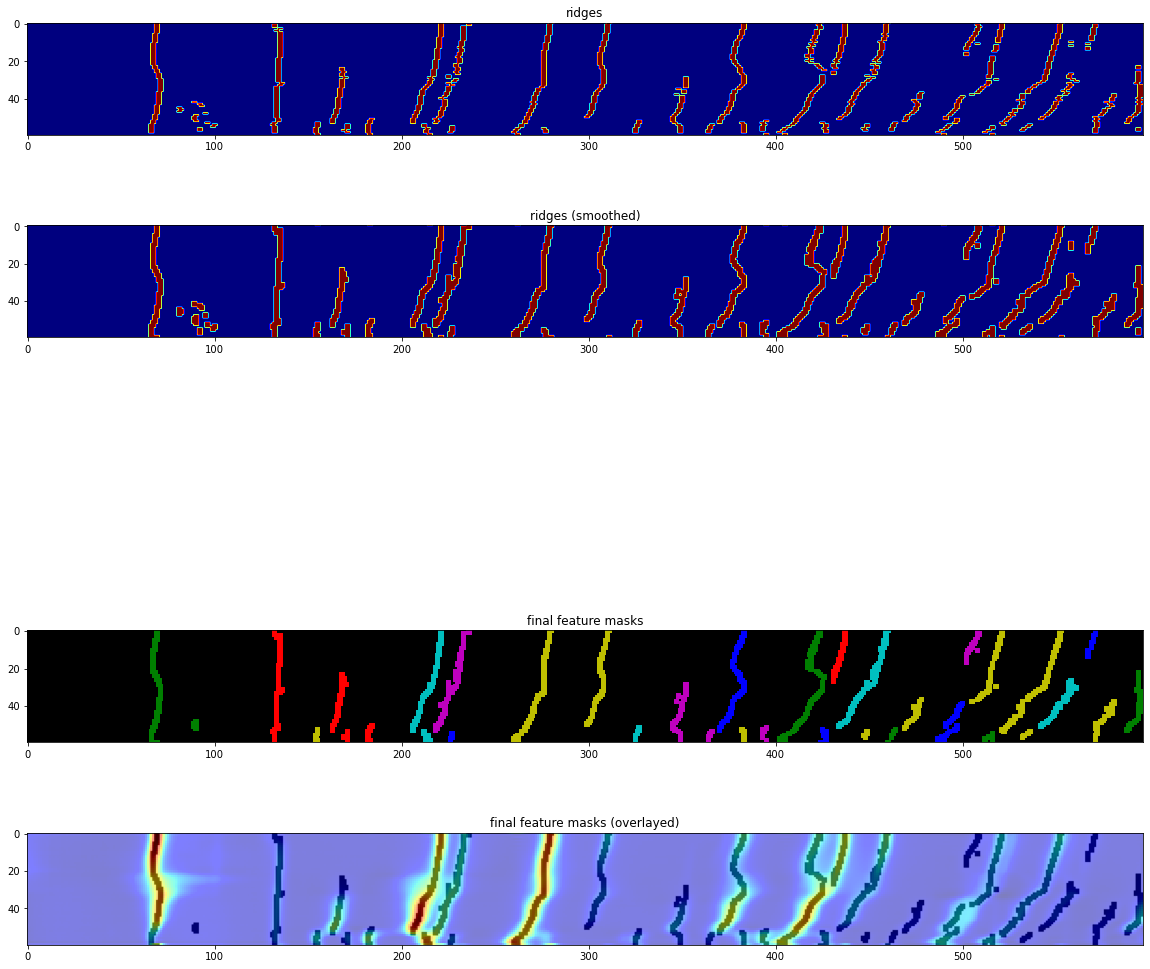

In [12]:
patterns_pp = fast_q - fast_q.min()
patterns_pp /= patterns_pp.mean()
fitlists = fsub_stop_2d[1]

labeled, feature_masks, activations, norm_, activations_n1 = feat.peakfit_featurize(patterns_pp, fitlists,
                                                                    size_thresh = 5, peakwidth = 1.5)

straightened_heatmap = feat.get_peakshift_corrected_heatmap(patterns, activations, labeled)

In [18]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 1, threshold_percentile = 75, thicken = True, size_thresh = 5, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 0, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1


patterns_pp_simple = fast_q * (fast_q > 0)
labeled_simple, feature_masks_simple, activations_simple, _norm, activations_n1_simple =\
    default_featurize(patterns_pp_simple);
straightened_heatmap_simple = feat.get_peakshift_corrected_heatmap(patterns, activations_simple, labeled_simple)

Peak at 69, start iteration with error = 0.5545020976281996
Peak at 69, iteration 0: error = 329.0564282686085
Peak at 68, start iteration with error = 0.6095358236299984
Peak at 68, iteration 0: error = 269.6812320048484
Peak at 276, start iteration with error = 0.5681175456092803
Peak at 276, iteration 0: error = 253.90649615815713
Peak at 276, start iteration with error = 0.5924144205885921
Peak at 276, iteration 0: error = 343.1635538387289
Peak at 210, start iteration with error = 0.6079997270347534
Peak at 210, iteration 0: error = 347.71054685561325
Peak at 207, start iteration with error = 0.5797085558049955
Peak at 207, iteration 0: error = 320.6681627999598
25
25.16454159500381


In [19]:
def plot_summary(activations_n1, straightened_heatmap):
    matplotlib.rcParams.update({'font.size': 18})

    fig = plt.figure(figsize=(12, 23), constrained_layout=False)
    spec = fig.add_gridspec(7, 2)

    vis.imargs = {'cmap': 'jet', 'aspect': 1.5}

    ax0 = fig.add_subplot(spec[0, :])
    vis.heatmap(ax0, np.log(1 + norm(patterns)), label = 'Log raw signal')
    # annotate_axes(ax0, 'ax0')

    ax1 = fig.add_subplot(spec[1, :])
    vis.heatmap(ax1, np.log10(np.abs(fast_T / patterns) ), "Log noise magnitude (relative)")
    #annotate_axes(ax10, 'ax10')


    ax2 = fig.add_subplot(spec[2, :])
    vis.heatmap(ax2, background, 'Extracted background')
    # plt.title("Log signal")

    ax3 = fig.add_subplot(spec[3, :])
    #heatmap(ax3, np.log(1 + norm(fast_q - fast_q.min())))
    vis.heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")
    # annotate_axes(ax11, 'ax11')

    ax4 = fig.add_subplot(spec[4, :])
    vis.heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
            label = 'Featurization (peak shift-corrected)')

    imargs = {'cmap': 'jet', 'aspect': 1}

    ax50 = fig.add_subplot(spec[5:7, 0])
    img = ax50.imshow(feat.csim_pairs(patterns), cmap = 'jet')
    plt.title('Cos similarity (raw)')
    plt.colorbar(img, ax = ax50)

    ax51 = fig.add_subplot(spec[5:7, 1])
    img = ax51.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
    plt.title('Cos similarity (featurized)')
    plt.colorbar(img, ax = ax51)


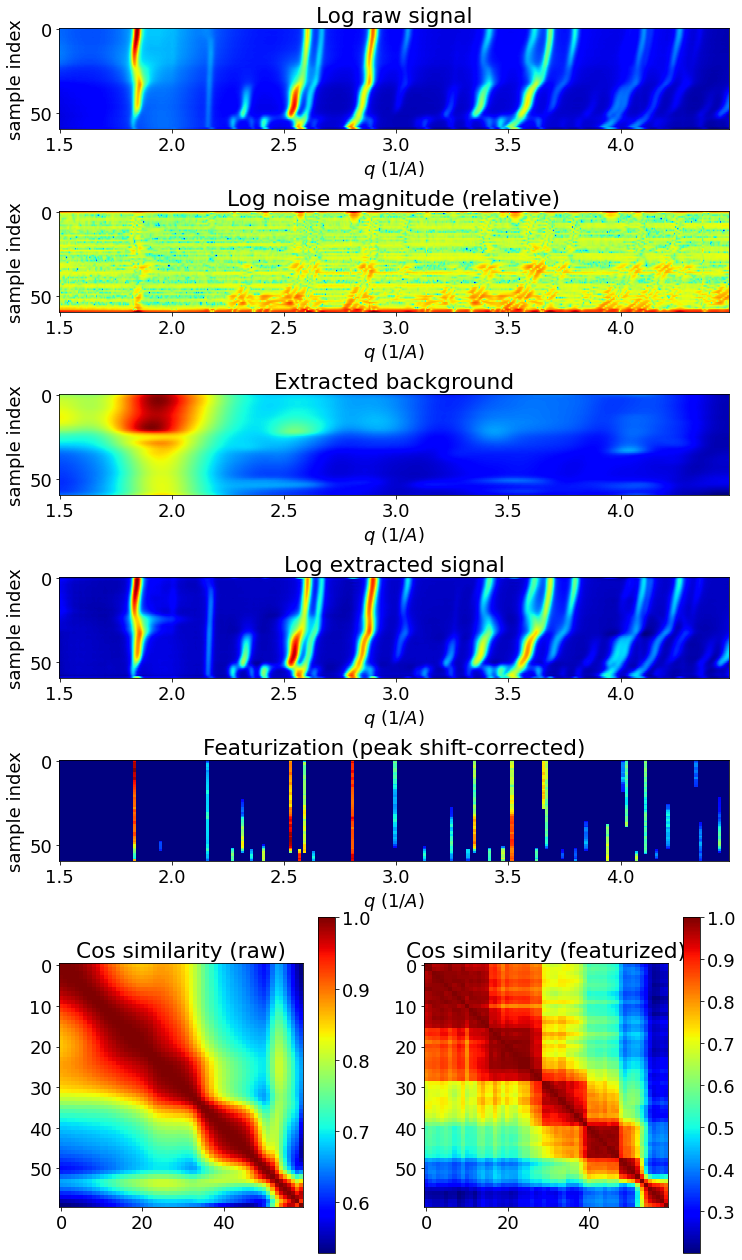

In [15]:
plot_summary(activations_n1)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/visualization.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels);


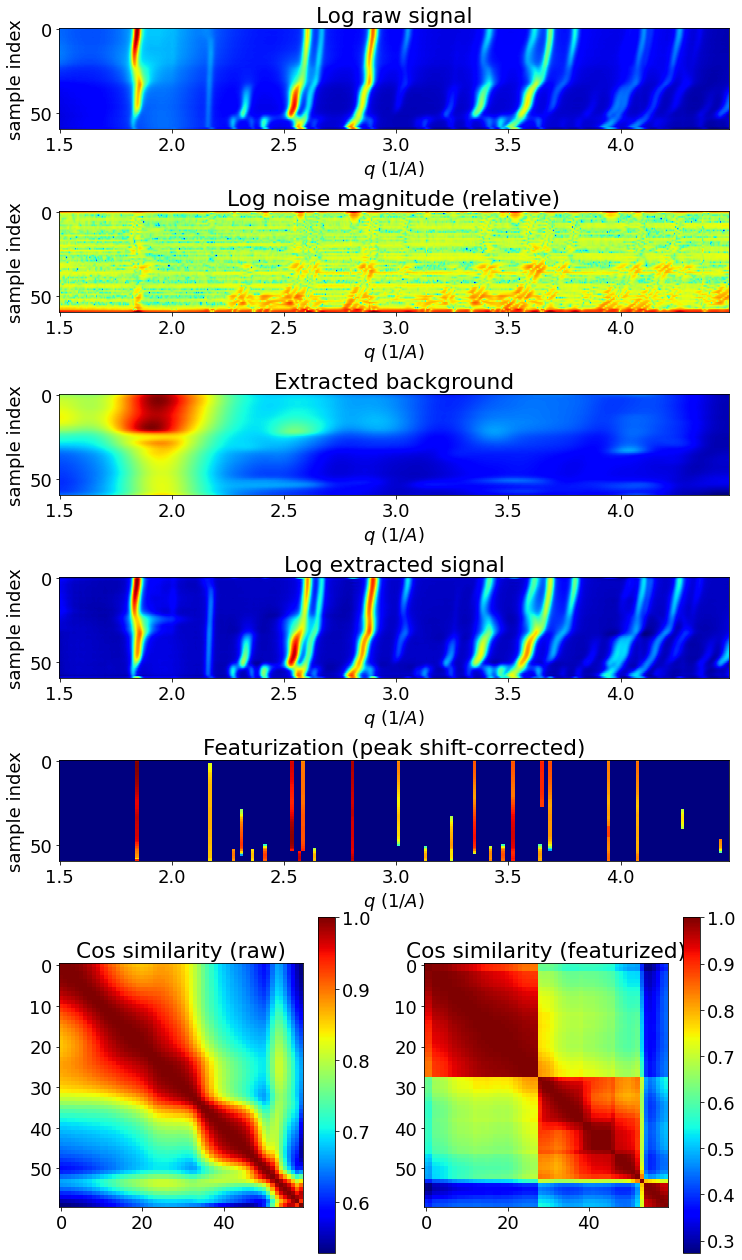

In [20]:
plot_summary(activations_n1_simple, straightened_heatmap_simple)

In [75]:
from importlib import reload
reload(vis)
reload(pf.hitp)
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [73]:
%pdb

Automatic pdb calling has been turned OFF


numBlocks: 357, dataPts/Block: 1.6722689075630253
[  0.  34. 126. 182. 229. 262. 296. 341. 407. 429. 447. 500. 511. 538.
 566. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  34., 126., 182., 229., 262., 296., 341., 407., 429., 447.,
       500., 511., 538., 566., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.405102059239611
0.4481095909584606
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.5708371891781829
4.631350798179307
Peak at 70, iteration 0: error = 0.4367773987437696
0.17455047238442295
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 133, start iteration with error = 0.5122958306063615
0.9674636372555737
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-

                                                                                                                                                                                                                                                                          Peak at 572, start iteration with error = 0.5044750662189831
62.49283583417723
Peak at 572, iteration 0: error = 4.541490290043695
12.0953915236043
Peak at 572, iteration 1: error = 4.195469233686134
4.73759052220687
Peak at 572, iteration 2: error = 4.649022920238569
Optimal parameters not found: The maximum number of function evaluations is exceeded.
     ----Saving data for block between 1.00 - 32.00
    ----Saving data for block between 33.00 - 125.00
    ----Saving data for block between 126.00 - 184.00
    ----Saving data for block between 185.00 - 228.00
    ----Saving data for block between 229.00 - 261.00
    ----Saving data for block between 262.00 - 295.00
    ----Saving data for block between 296.00 - 354.00
    

    ----Saving data for block between 513.00 - 537.00
    ----Saving data for block between 538.00 - 562.00
    ----Saving data for block between 563.00 - 595.00
done
numBlocks: 362, dataPts/Block: 1.649171270718232
[  0.  32. 126. 184. 227. 262. 302. 354. 406. 430. 447. 487. 513. 543.
 566. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  32., 126., 184., 227., 262., 302., 354., 406., 430., 447.,
       487., 513., 543., 566., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.4024882309118124
12.925115040745109
Peak at 1, iteration 0: error = 0.5707011493410163
1.2146794849116098
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.5725881155594668
544.2356775288098
Peak at 70, iteration 0: error = 26.30549654673577
18.397949417061774
Peak at 70, iter

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 234, start iteration with error = 0.6281993997884685
122.35544601577084
Peak at 234, iteration 0: error = 3.96358030781331
11.442047625211185
Peak at 234, iteration 1: error = 9.115371391473005
5.469220614156832
Peak at 234, iteration 2: error = 11.33482661473774
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 280, start iteration with error = 0.8950629083641026
245.48148405711348
Peak at 280, iteration 0: error = 2.496964226005762
3.274628500594679
Peak at 280, iteration 1: error = 4.343125724690054
2.5588433150727363
Peak at 280, iteration 2: error = 4.342911088402389
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 311, start iteration with error = 0.5845956412080794
117.06363694878146
Peak at 311, iteration 0: erro

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 438, start iteration with error = 0.6308834870095775
384.72866152843443
Peak at 438, iteration 0: error = 0.33639154016336564
61.25070956314759
Peak at 438, iteration 1: error = 0.07343336984634796
10.890670225932052
Peak at 438, iteration 2: error = 0.05622143533855226
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 460, start iteration with error = 0.5586232110839675
325.18610191503893
Peak at 460, iteration 0: error = 16.50138443741466
28.272731006118704
Peak at 460, iteration 1: error = 7.7897178539174305
8.990657153036384
Peak at 460, iteration 2: error = 9.299089107295941
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 508, start iteration with error = 0.6682990670579882
98.64269040267332
Peak at 508, iteration 

    ----Saving data for block between 180.00 - 227.00
    ----Saving data for block between 228.00 - 260.00
    ----Saving data for block between 261.00 - 295.00
    ----Saving data for block between 296.00 - 337.00
    ----Saving data for block between 338.00 - 405.00
    ----Saving data for block between 406.00 - 427.00
    ----Saving data for block between 428.00 - 445.00
    ----Saving data for block between 446.00 - 497.00
    ----Saving data for block between 498.00 - 508.00
    ----Saving data for block between 509.00 - 541.00
    ----Saving data for block between 542.00 - 565.00
    ----Saving data for block between 566.00 - 595.00
done
numBlocks: 366, dataPts/Block: 1.6311475409836065
[  0.  34. 129. 181. 227. 261. 301. 350. 406. 428. 450. 485. 509. 542.
 565. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  34., 129., 181., 227., 261., 301., 350., 406., 428., 450.,
       485., 509., 542., 565., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.2767698191272043
81.72202556183433
Peak at 136, iteration 0: error = 3.059179855518528
5.413149197312373
Peak at 136, iteration 1: error = 4.31822540711525
3.859838958443385
Peak at 136, iteration 2: error = 4.318225377302153
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 221, start iteration with error = 0.5104312660260996
492.6825841044123
Peak at 221, iteration 0: error = 4.370119789859314
1.9337697005014796
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 234, start iteration with error = 0.6102007896207131
230.52450970416407
Peak at 234, iteration 0: error = 5.059412297470748
27.42763191043783

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 421, start iteration with error = 0.8284121880713959
141.92054961029888
Peak at 421, iteration 0: error = 8.342902086960109
17.03152666944762
Peak at 421, iteration 1: error = 24.616852259226064
8.96208852191527
Peak at 421, iteration 2: error = 1.3798186219369537
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 437, start iteration with error = 0.6122902087038727
224.0667398502799
Peak at 437, iteration 0: error = 0.3692290361272102
35.60518436866332
Peak at 437, iteration 1: error = 0.04988152693299469
5.832731610573236
Peak at 437, iteration 2: error = 0.039234875221556824
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 459, start iteration with error = 0.550087305517213
172.29365896910306
Peak at 459, iteration 0: 

    ----Saving data for block between 192.00 - 225.00
    ----Saving data for block between 226.00 - 252.00
    ----Saving data for block between 253.00 - 294.00
    ----Saving data for block between 295.00 - 349.00
    ----Saving data for block between 350.00 - 403.00
    ----Saving data for block between 404.00 - 426.00
    ----Saving data for block between 427.00 - 445.00
    ----Saving data for block between 446.00 - 495.00
    ----Saving data for block between 496.00 - 506.00
    ----Saving data for block between 507.00 - 533.00
    ----Saving data for block between 534.00 - 559.00
    ----Saving data for block between 560.00 - 595.00
done
numBlocks: 365, dataPts/Block: 1.6356164383561644
[  0.  33. 129. 191. 227. 260. 295. 336. 404. 427. 445. 495. 510. 540.
 560. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  33., 129., 191., 227., 260., 295., 336., 404., 427., 445.,
       495., 510., 540., 560., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

done
numBlocks: 365, dataPts/Block: 1.6356164383561644
[  0.  32. 129. 190. 227. 260. 300. 349. 404. 428. 449. 495. 505. 540.
 560. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  32., 129., 190., 227., 260., 300., 349., 404., 428., 449.,
       495., 505., 540., 560., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.3472260284871898
18.008299659585866
Peak at 1, iteration 0: error = 0.7565176290226805
1.7554071587479736
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.6478308017724048
171.19354810720677
Peak at 68, iteration 0: error = 22.02913032427733
5.851482567994245
Peak at 68, iteration 1: error = 14.70605276682656
4.900851475903319
Peak at 68, iteration 2: error = 14.706052859327773
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-

    ----Saving data for block between 188.00 - 225.00
    ----Saving data for block between 226.00 - 259.00
    ----Saving data for block between 260.00 - 299.00
    ----Saving data for block between 300.00 - 348.00
    ----Saving data for block between 349.00 - 403.00
    ----Saving data for block between 404.00 - 425.00
    ----Saving data for block between 426.00 - 444.00
    ----Saving data for block between 445.00 - 493.00
    ----Saving data for block between 494.00 - 504.00
    ----Saving data for block between 505.00 - 532.00
    ----Saving data for block between 533.00 - 559.00
    ----Saving data for block between 560.00 - 595.00
done
numBlocks: 366, dataPts/Block: 1.6311475409836065
[  0.  32. 129. 187. 227. 259. 300. 349. 403. 425. 445. 494. 505. 539.
 564. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  32., 129., 187., 227., 259., 300., 349., 403., 425., 445.,
       494., 505., 539., 564., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.34981226830833406
29.25109409555104
Peak at 1, iteration 0: error = 0.7141650730010338
2.458775661206129
Peak at 1, iteration 1: error = 1.2818193416905184
1.599889036892414
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.6543474623459193
356.17393512492436
Peak at 68, iteration 0: error = 23.681631131849443
13.278011035244562
Peak at 68, iteration 1: error = 17.181978516494688
11.381349179114384
Peak at 68, iteration 2: error = 17.181978361431813
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 136, start iteration with error = 0.22633135634001908
119.3126176744246
P

    ----Saving data for block between 129.00 - 184.00
    ----Saving data for block between 185.00 - 225.00
    ----Saving data for block between 226.00 - 258.00
    ----Saving data for block between 259.00 - 295.00
    ----Saving data for block between 296.00 - 347.00
    ----Saving data for block between 348.00 - 403.00
    ----Saving data for block between 404.00 - 424.00
    ----Saving data for block between 425.00 - 447.00
    ----Saving data for block between 448.00 - 492.00
    ----Saving data for block between 493.00 - 532.00
    ----Saving data for block between 533.00 - 595.00
done
numBlocks: 377, dataPts/Block: 1.5835543766578248
[  0.  31. 126. 185. 226. 259. 300. 348. 404. 425. 448. 493. 532. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  31., 126., 185., 226., 259., 300., 348., 404., 425., 448.,
       493., 532., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start 

    ----Saving data for block between 31.00 - 128.00
    ----Saving data for block between 129.00 - 183.00
    ----Saving data for block between 184.00 - 224.00
    ----Saving data for block between 225.00 - 258.00
    ----Saving data for block between 259.00 - 299.00
    ----Saving data for block between 300.00 - 346.00
    ----Saving data for block between 347.00 - 403.00
    ----Saving data for block between 404.00 - 425.00
    ----Saving data for block between 426.00 - 447.00
    ----Saving data for block between 448.00 - 491.00
    ----Saving data for block between 492.00 - 531.00
    ----Saving data for block between 532.00 - 595.00
done
numBlocks: 392, dataPts/Block: 1.5229591836734695
[  0.  22. 129. 184. 225. 259. 300. 346. 405. 426. 444. 491. 538. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  22., 129., 184., 225., 259., 300., 346., 405., 426., 444.,
       491., 538., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/data

    ----Saving data for block between 170.00 - 225.00
    ----Saving data for block between 226.00 - 258.00
    ----Saving data for block between 259.00 - 299.00
    ----Saving data for block between 300.00 - 345.00
    ----Saving data for block between 346.00 - 404.00
    ----Saving data for block between 405.00 - 423.00
    ----Saving data for block between 424.00 - 443.00
    ----Saving data for block between 444.00 - 489.00
    ----Saving data for block between 490.00 - 531.00
    ----Saving data for block between 532.00 - 595.00
done
numBlocks: 387, dataPts/Block: 1.5426356589147288
[  0.  31. 125. 184. 226. 259. 300. 346. 405. 424. 447. 490. 532. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  31., 125., 184., 226., 259., 300., 346., 405., 424., 447.,
       490., 532., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration with error = 0.39601462497248335
16.13386708

    ----Saving data for block between 185.00 - 223.00
    ----Saving data for block between 224.00 - 257.00
    ----Saving data for block between 258.00 - 294.00
    ----Saving data for block between 295.00 - 343.00
    ----Saving data for block between 344.00 - 405.00
    ----Saving data for block between 406.00 - 423.00
    ----Saving data for block between 424.00 - 442.00
    ----Saving data for block between 443.00 - 487.00
    ----Saving data for block between 488.00 - 531.00
    ----Saving data for block between 532.00 - 591.00
dropping block with index 13
done
numBlocks: 386, dataPts/Block: 1.5466321243523315
[  0.  30. 125. 186. 224. 258. 300. 344. 406. 425. 446. 487. 532. 590.
 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  30., 125., 186., 224., 258., 300., 344., 406., 425., 446.,
       487., 532., 590., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration wit

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 219, start iteration with error = 0.7658050349991433
259.6006231275394
Peak at 219, iteration 0: error = 58.35170871246497
38.44575205421844
Peak at 219, iteration 1: error = 28.826859249430356
20.2687797528189
Peak at 219, iteration 2: error = 28.826858996584594
Optimal parameters not found: The maximum number of function evaluations is exceeded.
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 231, start iteration with error = 0.4870236002478233
206.19772341687982
Peak at 231, iteration 0: error = 6.53391192492755
51.0170006313853
Peak at 231, iteration 1: error = 41.774176404962155
28.864284794922188
Peak at 231, iteration 2: error = 46.21514171477028
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 277, start iterat

    ----Saving data for block between 162.00 - 185.00
    ----Saving data for block between 186.00 - 224.00
    ----Saving data for block between 225.00 - 257.00
    ----Saving data for block between 258.00 - 299.00
    ----Saving data for block between 300.00 - 340.00
    ----Saving data for block between 341.00 - 405.00
    ----Saving data for block between 406.00 - 439.00
    ----Saving data for block between 440.00 - 485.00
    ----Saving data for block between 486.00 - 530.00
    ----Saving data for block between 531.00 - 588.00
dropping block with index 13
done
numBlocks: 392, dataPts/Block: 1.5229591836734695
[  0.  28. 128. 160. 186. 224. 258. 299. 341. 406. 444. 486. 531. 588.
 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  28., 128., 160., 186., 224., 258., 299., 341., 406., 444.,
       486., 531., 588., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 1, start iteration wit

    ----Saving data for block between 159.00 - 186.00
    ----Saving data for block between 187.00 - 224.00
    ----Saving data for block between 225.00 - 257.00
    ----Saving data for block between 258.00 - 298.00
    ----Saving data for block between 299.00 - 339.00
    ----Saving data for block between 340.00 - 405.00
    ----Saving data for block between 406.00 - 442.00
    ----Saving data for block between 443.00 - 484.00
    ----Saving data for block between 485.00 - 530.00
    ----Saving data for block between 531.00 - 550.00
    ----Saving data for block between 551.00 - 587.00
    ----Saving data for block between 588.00 - 595.00
done
numBlocks: 387, dataPts/Block: 1.5426356589147288
[  0.  26. 128. 159. 187. 223. 258. 298. 341. 406. 442. 485. 531. 554.
 587. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  26., 128., 159., 187., 223., 258., 298., 341., 406., 442.,
       485., 531., 554., 587., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 230, start iteration with error = 0.5410254867522619
174.55707015660707
Peak at 230, iteration 0: error = 2.7984100463066244
43.47714298340524
Peak at 230, iteration 1: error = 53.385745537485555
25.567674510629203
Peak at 230, iteration 2: error = 53.38460073259752
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 277, start iteration with error = 0.7990464463054585
180.62608729082862
Peak at 277, iteration 0: error = 4.075243409040167
2.2388192590436713
Peak at 277, iteration 1: error = 8.666251820934152
1.4493556081589603
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 309, start iteration with error = 0.5157997656107427
82.06666699272016
Peak at 309, iteration 0: error = 4.179634245145861
3.6783514946924347
Peak at 

    ----Saving data for block between 187.00 - 222.00
    ----Saving data for block between 223.00 - 256.00
    ----Saving data for block between 257.00 - 297.00
    ----Saving data for block between 298.00 - 339.00
    ----Saving data for block between 340.00 - 353.00
    ----Saving data for block between 354.00 - 405.00
    ----Saving data for block between 406.00 - 439.00
    ----Saving data for block between 440.00 - 484.00
    ----Saving data for block between 485.00 - 529.00
    ----Saving data for block between 530.00 - 551.00
    ----Saving data for block between 552.00 - 586.00
    ----Saving data for block between 587.00 - 595.00
done
numBlocks: 402, dataPts/Block: 1.4850746268656716
[  0. 124. 158. 187. 224. 256. 297. 339. 355. 405. 440. 484. 530. 549.
 585. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 124., 158., 187., 224., 256., 297., 339., 355., 405., 440.,
       484., 530., 549., 585., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 135, start iteration with error = 0.42630658475135214
132.8672525913203
Peak at 135, iteration 0: error = 3.517199836888591
10.345633121631513
Peak at 135, iteration 1: error = 7.071878203510861
7.818427049073739
Peak at 135, iteration 2: error = 10.020099090288998
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 169, start iteration with error = 0.48036669021660505
16.551736671424443
Peak at 169, iteration 0: error = 4.874116686130643
1.0055851449787083
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 216, start iteration with error = 0.8505393785425053
75.39222619002024
Peak at 216, iteration 0: error = 7.264320228543406
8.721691025592126
Peak at 216, iteration 1: error = 48.02776607700837
5.91893337746653
Peak at 216

    ----Saving data for block between 188.00 - 222.00
    ----Saving data for block between 223.00 - 253.00
    ----Saving data for block between 254.00 - 296.00
    ----Saving data for block between 297.00 - 337.00
    ----Saving data for block between 338.00 - 363.00
    ----Saving data for block between 364.00 - 403.00
    ----Saving data for block between 404.00 - 436.00
    ----Saving data for block between 437.00 - 475.00
    ----Saving data for block between 476.00 - 522.00
    ----Saving data for block between 523.00 - 549.00
    ----Saving data for block between 550.00 - 581.00
    ----Saving data for block between 582.00 - 595.00
done
numBlocks: 419, dataPts/Block: 1.4248210023866348
[  0. 127. 156. 188. 221. 253. 296. 338. 358. 403. 434. 473. 527. 546.
 580. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 156., 188., 221., 253., 296., 338., 358., 403., 434.,
       473., 527., 546., 580., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 226, start iteration with error = 0.48314959338099056
75.47079112486004
Peak at 226, iteration 0: error = 9.97990743315349
16.273668974275633
Peak at 226, iteration 1: error = 45.852291580439534
8.58488607569679
Peak at 226, iteration 2: error = 52.290806153568745
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 274, start iteration with error = 0.827256750035436
52.98064254173116
Peak at 274, iteration 0: error = 5.555618558076283
1.349973790255282
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 307, start iteration with error = 0.40136068509948486
61.38781967150178
Peak at 307, iteration 0: error = 1.4998128670008017
1.208812598033612
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc

    ----Saving data for block between 187.00 - 219.00
    ----Saving data for block between 220.00 - 251.00
    ----Saving data for block between 252.00 - 288.00
    ----Saving data for block between 289.00 - 322.00
    ----Saving data for block between 323.00 - 362.00
    ----Saving data for block between 363.00 - 400.00
    ----Saving data for block between 401.00 - 430.00
    ----Saving data for block between 431.00 - 468.00
dropping block with index 11
    ----Saving data for block between 487.00 - 519.00
    ----Saving data for block between 520.00 - 542.00
    ----Saving data for block between 543.00 - 573.00
    ----Saving data for block between 574.00 - 595.00
done
numBlocks: 411, dataPts/Block: 1.4525547445255473
[  0. 127. 155. 187. 219. 252. 295. 335. 362. 400. 434. 468. 487. 524.
 542. 572. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 155., 187., 219., 252., 295., 335., 362., 400., 434.,
       468., 487., 524., 542., 572., 596.])}
/home/ollie/an

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.4234644092405631
214.96531974432799
Peak at 71, iteration 0: error = 12.819315815766616
4.5178136060416225
Peak at 71, iteration 1: error = 13.84384415450875
3.9556734657406496
Peak at 71, iteration 2: error = 17.769592155745435
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.4243391396342431
116.73501719538662
Peak at 134, iteration 0: error = 1.1282854090914172
1.6492843524844079
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 168, start iteration with error = 0.6510073190513663
168.83909197903628
Peak at 168, iteration 0: error = 4.651584275977289
3.593515372396131
Peak at 168, iteration 1: error = 5.622050681709034
2.3065536779181617
Peak at 168

    ----Saving data for block between 482.00 - 518.00
    ----Saving data for block between 519.00 - 540.00
    ----Saving data for block between 541.00 - 570.00
    ----Saving data for block between 571.00 - 582.00
    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 408, dataPts/Block: 1.463235294117647
[  0. 127. 155. 186. 218. 253. 288. 327. 362. 399. 433. 467. 486. 518.
 543. 571. 583. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 155., 186., 218., 253., 288., 327., 362., 399., 433.,
       467., 486., 518., 543., 571., 583., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 71, start iteration with error = 0.4454616061138569
442.27708733020097
Peak at 71, iteration 0: error = 11.626230141112707
8.818841709813077
Peak at 71, iteration 1: error = 12.148267310547768
7.943376064643694
Peak at 71, iteration 2: error = 15.834378653036653
 /home/ollie/anaconda3/lib

    ----Saving data for block between 186.00 - 217.00
    ----Saving data for block between 218.00 - 252.00
    ----Saving data for block between 253.00 - 287.00
    ----Saving data for block between 288.00 - 326.00
    ----Saving data for block between 327.00 - 361.00
    ----Saving data for block between 362.00 - 398.00
    ----Saving data for block between 399.00 - 432.00
    ----Saving data for block between 433.00 - 466.00
    ----Saving data for block between 467.00 - 485.00
    ----Saving data for block between 486.00 - 517.00
    ----Saving data for block between 518.00 - 542.00
    ----Saving data for block between 543.00 - 570.00
    ----Saving data for block between 571.00 - 582.00
    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 412, dataPts/Block: 1.4490291262135921
[  0. 127. 155. 186. 218. 253. 287. 325. 357. 399. 432. 467. 482. 522.
 543. 571. 587. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 155., 186., 218., 253., 287.,

    ----Saving data for block between 186.00 - 217.00
    ----Saving data for block between 218.00 - 252.00
    ----Saving data for block between 253.00 - 286.00
    ----Saving data for block between 287.00 - 324.00
    ----Saving data for block between 325.00 - 356.00
    ----Saving data for block between 357.00 - 398.00
    ----Saving data for block between 399.00 - 431.00
    ----Saving data for block between 432.00 - 466.00
    ----Saving data for block between 467.00 - 481.00
    ----Saving data for block between 482.00 - 521.00
    ----Saving data for block between 522.00 - 542.00
    ----Saving data for block between 543.00 - 570.00
    ----Saving data for block between 571.00 - 586.00
    ----Saving data for block between 587.00 - 595.00
done
numBlocks: 414, dataPts/Block: 1.4420289855072463
[  0. 124. 155. 187. 218. 253. 294. 329. 361. 398. 429. 467. 482. 518.
 542. 571. 584. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 124., 155., 187., 218., 253., 294.,

    ----Saving data for block between 187.00 - 217.00
    ----Saving data for block between 218.00 - 252.00
    ----Saving data for block between 253.00 - 293.00
    ----Saving data for block between 294.00 - 328.00
    ----Saving data for block between 329.00 - 360.00
    ----Saving data for block between 361.00 - 397.00
    ----Saving data for block between 398.00 - 428.00
    ----Saving data for block between 429.00 - 466.00
    ----Saving data for block between 467.00 - 481.00
    ----Saving data for block between 482.00 - 517.00
    ----Saving data for block between 518.00 - 541.00
    ----Saving data for block between 542.00 - 570.00
    ----Saving data for block between 571.00 - 583.00
    ----Saving data for block between 584.00 - 595.00
done
numBlocks: 412, dataPts/Block: 1.4490291262135921
[  0.  87. 124. 155. 187. 218. 253. 294. 329. 357. 398. 429. 467. 482.
 518. 539. 570. 584. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  87., 124., 155., 187., 218., 

                                                                                                                                                                                                                                                                                                                                                                                                   Peak at 595, start iteration with error = 0.5789421496846661
438.0913178070403
Peak at 595, iteration 0: error = 9.756567926136379
32.770418347903124
Peak at 595, iteration 1: error = 6.863298874563802
27.52598219367723
Peak at 595, iteration 2: error = 7.217761222589186
Optimal parameters not found: The maximum number of function evaluations is exceeded.
     ----Saving data for block between 1.00 - 86.00
    ----Saving data for block between 87.00 - 123.00
    ----Saving data for block between 124.00 - 154.00
    ----Saving data for block between 155.00 - 186.00
    ----Saving data for block between 187.

    ----Saving data for block between 155.00 - 186.00
    ----Saving data for block between 187.00 - 216.00
    ----Saving data for block between 217.00 - 252.00
    ----Saving data for block between 253.00 - 293.00
    ----Saving data for block between 294.00 - 325.00
    ----Saving data for block between 326.00 - 356.00
    ----Saving data for block between 357.00 - 397.00
    ----Saving data for block between 398.00 - 427.00
    ----Saving data for block between 428.00 - 466.00
    ----Saving data for block between 467.00 - 485.00
    ----Saving data for block between 486.00 - 512.00
    ----Saving data for block between 513.00 - 541.00
    ----Saving data for block between 542.00 - 569.00
    ----Saving data for block between 570.00 - 582.00
    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 413, dataPts/Block: 1.4455205811138014
[  0.  86. 124. 155. 188. 217. 252. 294. 327. 361. 397. 431. 466. 481.
 521. 541. 570. 586. 596.]
False
Experimental Info used: 

{'blo

    ----Saving data for block between 86.00 - 123.00
    ----Saving data for block between 124.00 - 154.00
    ----Saving data for block between 155.00 - 187.00
    ----Saving data for block between 188.00 - 216.00
    ----Saving data for block between 217.00 - 251.00
    ----Saving data for block between 252.00 - 293.00
    ----Saving data for block between 294.00 - 326.00
    ----Saving data for block between 327.00 - 360.00
    ----Saving data for block between 361.00 - 396.00
    ----Saving data for block between 397.00 - 430.00
    ----Saving data for block between 431.00 - 465.00
    ----Saving data for block between 466.00 - 480.00
    ----Saving data for block between 481.00 - 520.00
    ----Saving data for block between 521.00 - 540.00
    ----Saving data for block between 541.00 - 569.00
    ----Saving data for block between 570.00 - 585.00
    ----Saving data for block between 586.00 - 595.00
done
numBlocks: 410, dataPts/Block: 1.4560975609756097
[  0.  84. 123. 155. 187. 21

    ----Saving data for block between 155.00 - 186.00
    ----Saving data for block between 187.00 - 216.00
    ----Saving data for block between 217.00 - 251.00
    ----Saving data for block between 252.00 - 293.00
    ----Saving data for block between 294.00 - 325.00
    ----Saving data for block between 326.00 - 360.00
    ----Saving data for block between 361.00 - 396.00
    ----Saving data for block between 397.00 - 427.00
    ----Saving data for block between 428.00 - 465.00
    ----Saving data for block between 466.00 - 484.00
    ----Saving data for block between 485.00 - 511.00
    ----Saving data for block between 512.00 - 540.00
    ----Saving data for block between 541.00 - 568.00
    ----Saving data for block between 569.00 - 582.00
    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 409, dataPts/Block: 1.4596577017114913
[  0.  83. 123. 155. 188. 217. 251. 287. 325. 360. 396. 427. 465. 480.
 516. 540. 568. 585. 596.]
False
Experimental Info used: 

{'blo

    ----Saving data for block between 155.00 - 187.00
    ----Saving data for block between 188.00 - 216.00
    ----Saving data for block between 217.00 - 250.00
    ----Saving data for block between 251.00 - 286.00
    ----Saving data for block between 287.00 - 324.00
    ----Saving data for block between 325.00 - 359.00
    ----Saving data for block between 360.00 - 395.00
    ----Saving data for block between 396.00 - 426.00
    ----Saving data for block between 427.00 - 464.00
    ----Saving data for block between 465.00 - 479.00
    ----Saving data for block between 480.00 - 515.00
    ----Saving data for block between 516.00 - 539.00
    ----Saving data for block between 540.00 - 567.00
    ----Saving data for block between 568.00 - 584.00
    ----Saving data for block between 585.00 - 595.00
done
numBlocks: 409, dataPts/Block: 1.4596577017114913
[  0.  82. 123. 149. 188. 216. 251. 287. 327. 360. 395. 427. 464. 480.
 511. 540. 567. 582. 596.]
False
Experimental Info used: 

{'blo

    ----Saving data for block between 464.00 - 479.00
    ----Saving data for block between 480.00 - 510.00
    ----Saving data for block between 511.00 - 539.00
    ----Saving data for block between 540.00 - 566.00
    ----Saving data for block between 567.00 - 581.00
    ----Saving data for block between 582.00 - 595.00
done
numBlocks: 412, dataPts/Block: 1.4490291262135921
[  0.  81. 123. 149. 189. 216. 251. 287. 322. 355. 393. 426. 463. 479.
 515. 539. 566. 583. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  81., 123., 149., 189., 216., 251., 287., 322., 355., 393.,
       426., 463., 479., 515., 539., 566., 583., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.29776154391784276
115.49568792393038
Peak at 70, iteration 0: error = 8.741619608001802
1.4893437611735234
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/datapr

    ----Saving data for block between 583.00 - 595.00
done
numBlocks: 410, dataPts/Block: 1.4560975609756097
[  0.  80. 123. 148. 187. 215. 250. 287. 323. 358. 392. 429. 453. 478.
 515. 538. 565. 579. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  80., 123., 148., 187., 215., 250., 287., 323., 358., 392.,
       429., 453., 478., 515., 538., 565., 579., 596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 70, start iteration with error = 0.36506296125068105
128.13791825514548
Peak at 70, iteration 0: error = 6.157283362147039
1.7892447223092613
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.8875837865076381
15.894757479251046
Peak at 91, iteration 0: error = 0.5215637026232028
1.5665599633074954
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/da

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 91, start iteration with error = 0.8027007139306861
54.47635977969003
Peak at 91, iteration 0: error = 1.3904967156945334
5.986388632612262
Peak at 91, iteration 1: error = 1.233607057021586
4.872635887021258
Peak at 91, iteration 2: error = 1.1379540352713013
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.40535589027833213
135.83946523541636
Peak at 134, iteration 0: error = 0.8308587770778466
5.598341841054141
Peak at 134, iteration 1: error = 3.919384380372296
3.7394831448327284
Peak at 134, iteration 2: error = 3.919384370452315
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 165, start iteration with error = 0.6949199605651543
32.38563868113842
Peak at 165, iteration 0: error 

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.4202730863677096
158.50340092653414
Peak at 134, iteration 0: error = 2.2599377010263564
11.132994296110228
Peak at 134, iteration 1: error = 6.664658775354348
7.752449260145179
Peak at 134, iteration 2: error = 8.381142782734715
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 164, start iteration with error = 0.7471184426286885
28.0306877681403
Peak at 164, iteration 0: error = 21.689843850402173
1.9024971457014215
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 185, start iteration with error = 0.6639437126493941
4.9814828469573955
Peak at 185, iteration 0: error = 7.490223506409372
0.48199413673411895
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/data

 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 134, start iteration with error = 0.45310641060527423
49.1321306194696
Peak at 134, iteration 0: error = 2.3690197501758186
3.763141221425464
Peak at 134, iteration 1: error = 7.484679907370006
2.5525924010485994
Peak at 134, iteration 2: error = 8.817539951916281
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 164, start iteration with error = 0.8500520050626188
45.06671792616267
Peak at 164, iteration 0: error = 31.958301009322142
7.482153596350501
Peak at 164, iteration 1: error = 9.515776338590355
3.5041002453196235
Peak at 164, iteration 2: error = 4.34600299305431
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 184, start iteration with error = 0.7619542067799303
17.56320370952095
Peak at 184, iteration 0: error

done
numBlocks: 413, dataPts/Block: 1.4455205811138014
[  0.  76. 123. 142. 159. 174. 195. 214. 248. 311. 334. 358. 375. 386.
 399. 420. 446. 458. 477. 507. 557. 581. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  76., 123., 142., 159., 174., 195., 214., 248., 311., 334.,
       358., 375., 386., 399., 420., 446., 458., 477., 507., 557., 581.,
       596.])}
/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 68, start iteration with error = 0.2868703458766
45.17743083088109
Peak at 68, iteration 0: error = 2.8854070219947
0.9276802713688446
 /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig
Peak at 95, start iteration with error = 0.8681532998658422
16.3644199416496
Peak at 95, iteration 0: error = 1.280356879100185
2.7118737286448873
Peak at 95, iteration 1: error = 0.9007219143815494
0.9713344379245482
 /home/ollie/anaconda3/lib/p

    ----Saving data for block between 142.00 - 158.00
    ----Saving data for block between 159.00 - 173.00
    ----Saving data for block between 174.00 - 194.00
    ----Saving data for block between 195.00 - 213.00
    ----Saving data for block between 214.00 - 247.00
    ----Saving data for block between 248.00 - 310.00
    ----Saving data for block between 311.00 - 333.00
    ----Saving data for block between 334.00 - 357.00
    ----Saving data for block between 358.00 - 374.00
    ----Saving data for block between 375.00 - 385.00
    ----Saving data for block between 386.00 - 398.00
    ----Saving data for block between 399.00 - 419.00
    ----Saving data for block between 420.00 - 445.00
dropping block with index 16
    ----Saving data for block between 458.00 - 476.00
    ----Saving data for block between 477.00 - 506.00
    ----Saving data for block between 507.00 - 556.00
    ----Saving data for block between 557.00 - 580.00
    ----Saving data for block between 581.00 - 595.00

    ----Saving data for block between 146.00 - 163.00
    ----Saving data for block between 164.00 - 174.00
    ----Saving data for block between 175.00 - 193.00
    ----Saving data for block between 194.00 - 246.00
    ----Saving data for block between 247.00 - 309.00
    ----Saving data for block between 310.00 - 339.00
    ----Saving data for block between 340.00 - 354.00
    ----Saving data for block between 355.00 - 370.00
    ----Saving data for block between 371.00 - 386.00
    ----Saving data for block between 387.00 - 399.00
    ----Saving data for block between 400.00 - 418.00
    ----Saving data for block between 419.00 - 443.00
    ----Saving data for block between 444.00 - 452.00
    ----Saving data for block between 453.00 - 474.00
    ----Saving data for block between 475.00 - 508.00
    ----Saving data for block between 509.00 - 530.00
    ----Saving data for block between 531.00 - 562.00
    ----Saving data for block between 563.00 - 582.00
dropping block with index 21

    ----Saving data for block between 75.00 - 122.00
    ----Saving data for block between 123.00 - 145.00
    ----Saving data for block between 146.00 - 164.00
    ----Saving data for block between 165.00 - 174.00
    ----Saving data for block between 175.00 - 193.00
    ----Saving data for block between 194.00 - 223.00
    ----Saving data for block between 224.00 - 245.00
    ----Saving data for block between 246.00 - 309.00
    ----Saving data for block between 310.00 - 335.00
    ----Saving data for block between 336.00 - 354.00
    ----Saving data for block between 355.00 - 371.00
    ----Saving data for block between 372.00 - 385.00
    ----Saving data for block between 386.00 - 398.00
    ----Saving data for block between 399.00 - 419.00
    ----Saving data for block between 420.00 - 442.00
    ----Saving data for block between 443.00 - 456.00
    ----Saving data for block between 457.00 - 474.00
    ----Saving data for block between 475.00 - 505.00
    ----Saving data for block

    ----Saving data for block between 142.00 - 161.00
    ----Saving data for block between 162.00 - 174.00
    ----Saving data for block between 175.00 - 198.00
    ----Saving data for block between 199.00 - 222.00
    ----Saving data for block between 223.00 - 244.00
    ----Saving data for block between 245.00 - 271.00
    ----Saving data for block between 272.00 - 309.00
    ----Saving data for block between 310.00 - 334.00
    ----Saving data for block between 335.00 - 354.00
    ----Saving data for block between 355.00 - 372.00
    ----Saving data for block between 373.00 - 385.00
    ----Saving data for block between 386.00 - 396.00
    ----Saving data for block between 397.00 - 417.00
    ----Saving data for block between 418.00 - 442.00
    ----Saving data for block between 443.00 - 452.00
    ----Saving data for block between 453.00 - 473.00
    ----Saving data for block between 474.00 - 503.00
    ----Saving data for block between 504.00 - 527.00
    ----Saving data for bloc

    ----Saving data for block between 74.00 - 122.00
    ----Saving data for block between 123.00 - 142.00
    ----Saving data for block between 143.00 - 161.00
    ----Saving data for block between 162.00 - 174.00
    ----Saving data for block between 175.00 - 198.00
    ----Saving data for block between 199.00 - 222.00
    ----Saving data for block between 223.00 - 244.00
    ----Saving data for block between 245.00 - 271.00
    ----Saving data for block between 272.00 - 309.00
    ----Saving data for block between 310.00 - 333.00
    ----Saving data for block between 334.00 - 357.00
    ----Saving data for block between 358.00 - 368.00
    ----Saving data for block between 369.00 - 385.00
    ----Saving data for block between 386.00 - 394.00
    ----Saving data for block between 395.00 - 419.00
    ----Saving data for block between 420.00 - 442.00
    ----Saving data for block between 443.00 - 451.00
    ----Saving data for block between 452.00 - 472.00
    ----Saving data for block

dropping block with index 1
    ----Saving data for block between 123.00 - 146.00
    ----Saving data for block between 147.00 - 161.00
    ----Saving data for block between 162.00 - 174.00
    ----Saving data for block between 175.00 - 198.00
    ----Saving data for block between 199.00 - 222.00
    ----Saving data for block between 223.00 - 243.00
    ----Saving data for block between 244.00 - 269.00
    ----Saving data for block between 270.00 - 295.00
    ----Saving data for block between 296.00 - 339.00
    ----Saving data for block between 340.00 - 357.00
    ----Saving data for block between 358.00 - 368.00
    ----Saving data for block between 369.00 - 385.00
    ----Saving data for block between 386.00 - 416.00
    ----Saving data for block between 417.00 - 442.00
dropping block with index 16
dropping block with index 17
    ----Saving data for block between 472.00 - 500.00
    ----Saving data for block between 501.00 - 525.00
dropping block with index 20
    ----Saving data f

dropping block with index 4
    ----Saving data for block between 175.00 - 200.00
    ----Saving data for block between 201.00 - 224.00
dropping block with index 7
    ----Saving data for block between 245.00 - 271.00
dropping block with index 9
dropping block with index 10
dropping block with index 11
dropping block with index 12
dropping block with index 13
    ----Saving data for block between 389.00 - 396.00
    ----Saving data for block between 397.00 - 419.00
dropping block with index 16
dropping block with index 17
dropping block with index 18
    ----Saving data for block between 475.00 - 501.00
    ----Saving data for block between 502.00 - 529.00
dropping block with index 21
dropping block with index 22
dropping block with index 23
done


In [25]:
fitlists = fsub_stop_2d[1]

In [30]:
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

Peak at 69, start iteration with error = 0.28303189093840975
Peak at 69, iteration 0: error = 0.37642680409888535
Peak at 68, start iteration with error = 0.20509879552498964
Peak at 68, iteration 0: error = 0.2724127252441384
Peak at 276, start iteration with error = 0.20768222283960272
Peak at 276, iteration 0: error = 0.2431648275785869
Peak at 276, start iteration with error = 0.2658421111810695
Peak at 276, iteration 0: error = 0.37298791449381674
Peak at 210, start iteration with error = 0.2529885944181589
Peak at 210, iteration 0: error = 0.3781419240157165
Peak at 207, start iteration with error = 0.24417104494072686
Peak at 207, iteration 0: error = 0.3437307638471966
using fitlists
using fitlists
40
0.7329528874292668


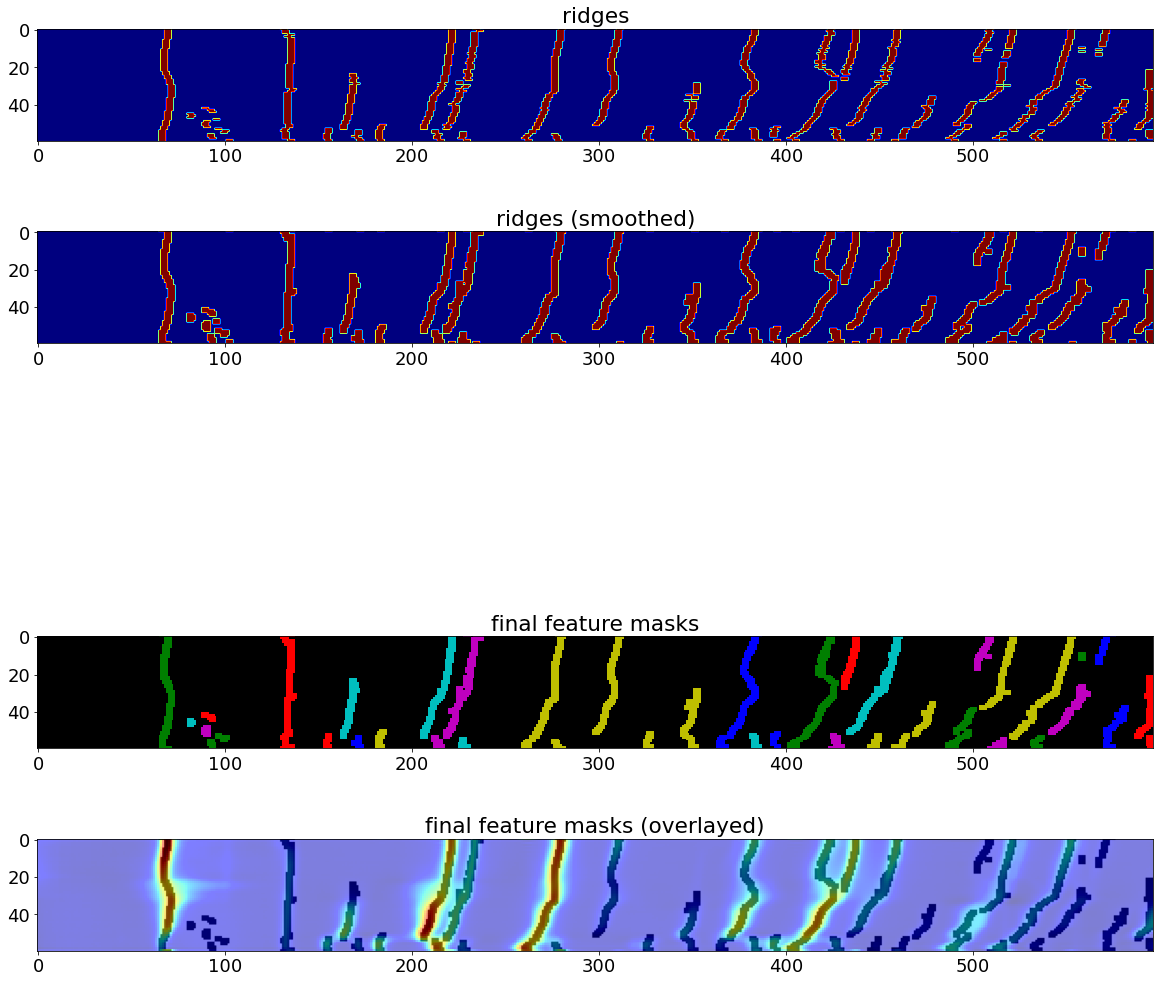

## Peak fitting

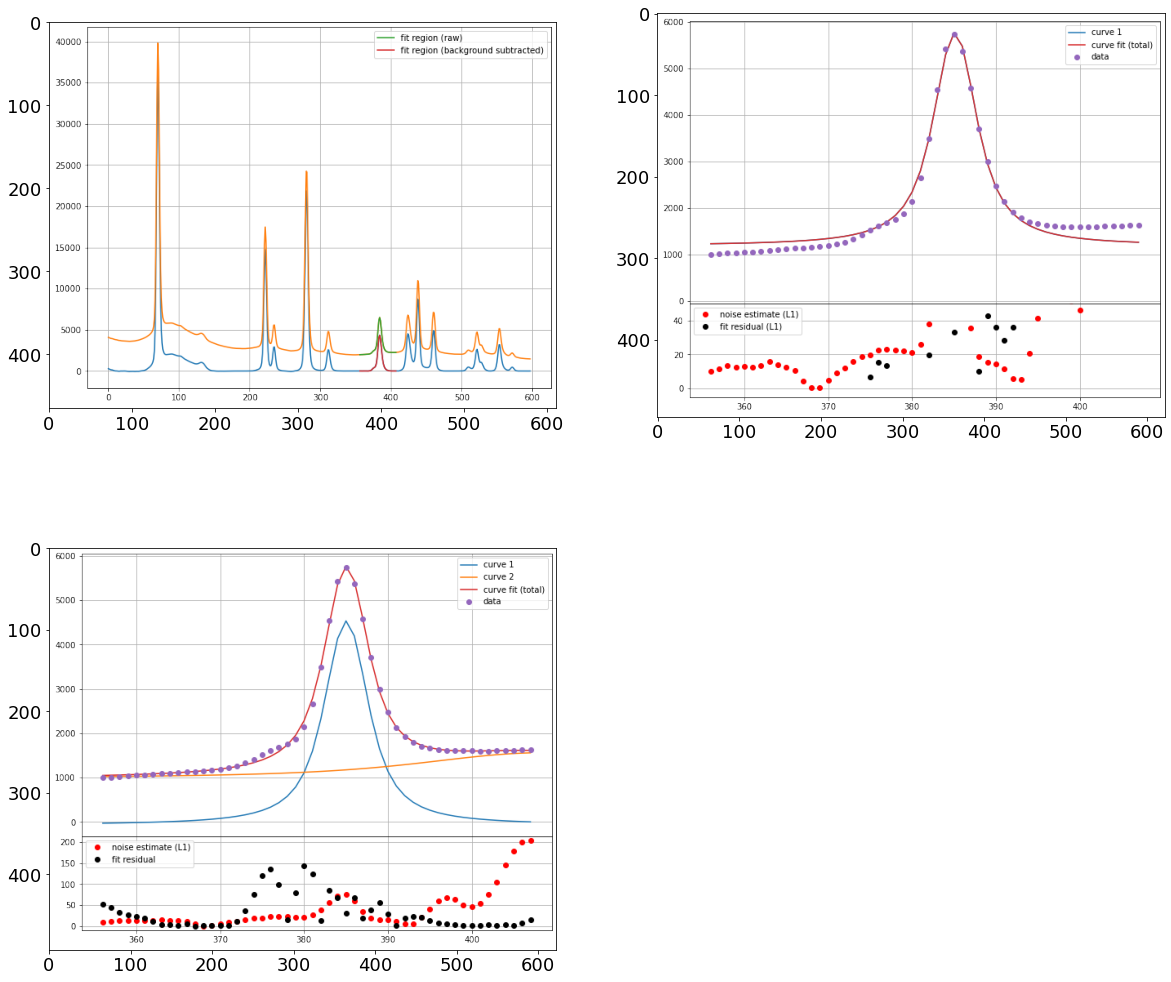

In [25]:
from PIL import Image
img1 = Image.open(path + 'BBA/context.png')
img2 = Image.open(path + 'BBA/without_bg.png')
img3 = Image.open(path + 'BBA/with_bg.png')

a, b = 2, 2
plt.subplot(a, b, 1)
plt.imshow(img1)

plt.subplot(a, b, 2)
plt.imshow(img2)

plt.subplot(a, b, 3)
plt.imshow(img3)

Peak fitting demo

In [58]:
from ipywidgets import interactive
import nibabel as nib
import k3d
import math
import numpy as np
from k3d.helpers import download
from torch.utils.data import TensorDataset, DataLoader
import torch
import matplotlib.pyplot as plt

In [59]:
def heatmap3d(patterns, interpolation = True, color_range = [0.2,.9], scale = True, auto_color = True, **kwargs):
    """
    Plot a 3-dimensional heatmap.
    """
    Nx = Ny = 100
    img = patterns
    dx, dy, dz = 1, 1, 1#nii_source.header.get_zooms()

    if scale:
        img = img.astype(np.float32) / img.max()#np.swapaxes(img,0,2).astype(np.float32)
        img = np.log(1 + 10 * img)

    nz, ny, nx = img.shape

    xmin, xmax, ymin, ymax = 0, 1, 0, .25
    if auto_color:
        volume = k3d.volume(img, interpolation = interpolation, bounds = np.array([0, 1, 0, .25, 0, .25]),
          color_range=color_range, color_map=np.array(k3d.basic_color_maps.Jet, dtype=np.float32), **kwargs)
    else:
        volume = k3d.volume(img, interpolation = interpolation, bounds = np.array([0, 1, 0, .25, 0, .25]),
          color_range=color_range, **kwargs)
        
    x = np.linspace(xmin, xmax, Nx)
    y = np.linspace(ymin, ymax, Ny)
    x, y = np.meshgrid(x, y)
    heights = np.ones_like(x) / 10
        
    obj = k3d.surface(heights, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, alpha = .01)

    plot = k3d.plot()
    plot += volume
    
    plot += obj
    
    plot.display()
    return plot, volume

In [68]:
plot, volume1 = heatmap3d(d3d.m3d);

Output()

In [64]:
mask = (d3d.m3d.sum(axis = 2) != 0)

In [67]:
vfeats = (mask[..., None] * rmap(labeled))
volume.volume = vfeats
vals = np.unique(vfeats.ravel())
vals.sort()
opacity_func = np.ones((len(vals), 2), dtype = np.float32)
opacity_func[:, 0] = vals
color_range = (np.min(vfeats), np.max(vfeats))

ValueError: operands could not be broadcast together with shapes (15,15,1) (60,597) 

In [31]:
from xrdc.datasets import d3d

In [34]:
d3d.m3d

(15, 15, 800)

In [46]:
k3d.surface?